In [5]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

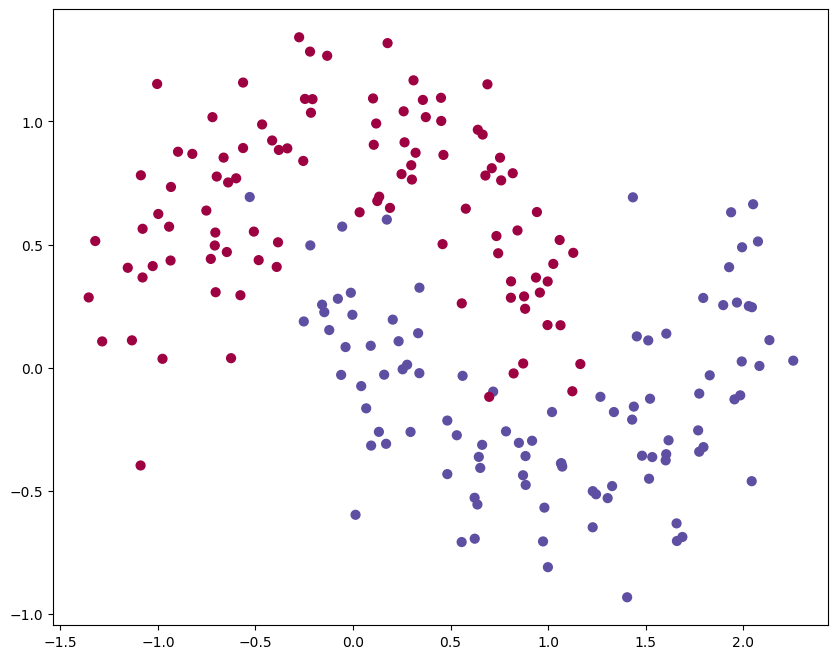

In [6]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

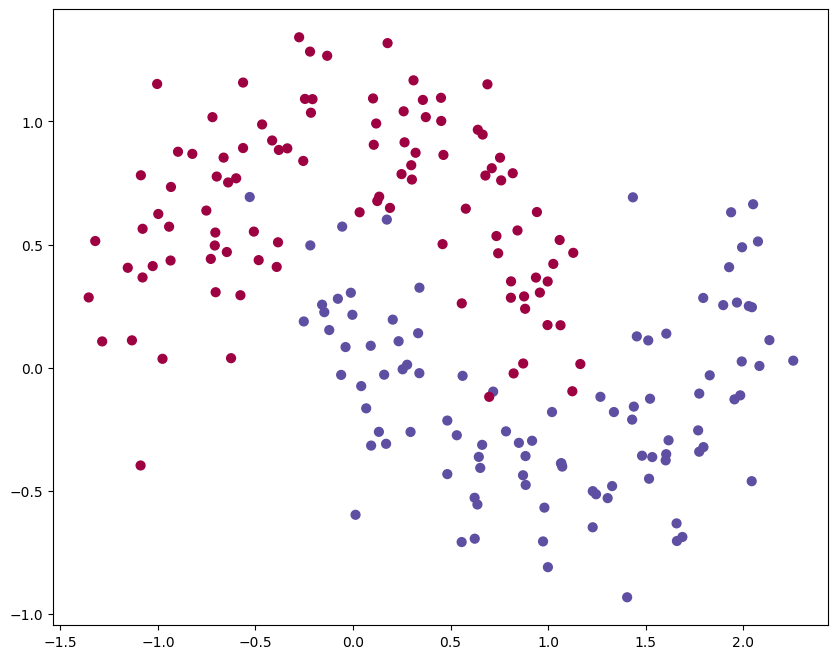

In [7]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [8]:
# Melatih data dengan algoritma Logistic Regression
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV()

In [9]:
# Fungsi untuk untuk plotting hasil training dan prediksi
def plot_decision_boundary(pred_func):
    # Konfigurasi nilai minimum dan maksimum
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Prediksi nilai untuk keseluruhan
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plotting tren data training
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Logistic Regression')

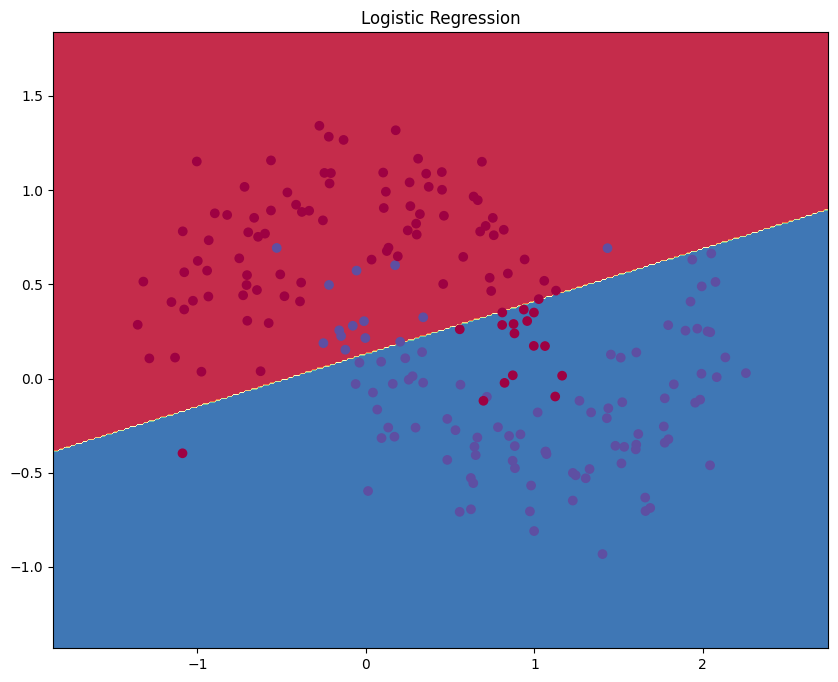

In [10]:
# Plot logistic regression
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

In [11]:
training_set_size = len(X) # Besar training set 
nn_input_dim = 2 # dimensi lapisan masukan 
nn_output_dim = 2 # dimensi lapisan keluaran
learning_rate = 0.01 
regularization = 0.01

In [12]:
# Menghitung fungsi rugi
def loss_func(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # menghitung fungsi rugi
    correct_logprobs = -np.log(probs[range(training_set_size), y])
    data_loss = np.sum(correct_logprobs)
    data_loss += regularization / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./training_set_size * data_loss

In [13]:
# Prediksi output (0 atau 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)
    return np.argmax(probs, axis = 1)

In [14]:
# Membangun model dan mengembalikan hasil model
# - nn_hdim: jumlah neuron pada lapisan tersembunyi
# - num_gd: jumlah yang melewati training data 
# - print_loss: jika True akan menampilkan nilai rugi setiap iterasi per 1000 kali
def build_model(nn_hdim, num_gd=20000, print_loss=False):
    
    # Inisialisasi parameter.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # mengembalikan hasil model
    model = {}
    
    # Gradient descent untuk setiap batch
    for i in range(0, num_gd):

        # Propagasi ke depan
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Propagasi ke belakang
        delta3 = probs
        delta3[range(training_set_size), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # regularization
        dW2 += regularization * W2
        dW1 += regularization * W1

        # perbarui parameter gradient descent
        W1 += -learning_rate * dW1
        b1 += -learning_rate * db1
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2
        
        # Memberikan nilai parameter baru
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Menampilkan nilai fungsi rugi (opsional)
        if print_loss and i % 1000 == 0:
          print("Rugi selepas iterasi ke %i: %f" %(i, loss_func(model)))
    
    return model

Rugi selepas iterasi ke 0: 0.432387
Rugi selepas iterasi ke 1000: 0.068947
Rugi selepas iterasi ke 2000: 0.068927
Rugi selepas iterasi ke 3000: 0.070752
Rugi selepas iterasi ke 4000: 0.070748
Rugi selepas iterasi ke 5000: 0.070751
Rugi selepas iterasi ke 6000: 0.070754
Rugi selepas iterasi ke 7000: 0.070756
Rugi selepas iterasi ke 8000: 0.070757
Rugi selepas iterasi ke 9000: 0.070758
Rugi selepas iterasi ke 10000: 0.070758
Rugi selepas iterasi ke 11000: 0.070758
Rugi selepas iterasi ke 12000: 0.070758
Rugi selepas iterasi ke 13000: 0.070758
Rugi selepas iterasi ke 14000: 0.070758
Rugi selepas iterasi ke 15000: 0.070758
Rugi selepas iterasi ke 16000: 0.070758
Rugi selepas iterasi ke 17000: 0.070758
Rugi selepas iterasi ke 18000: 0.070758
Rugi selepas iterasi ke 19000: 0.070758


Text(0.5, 1.0, 'Plot dengan lapisan tersembunyi sebanyak 3')

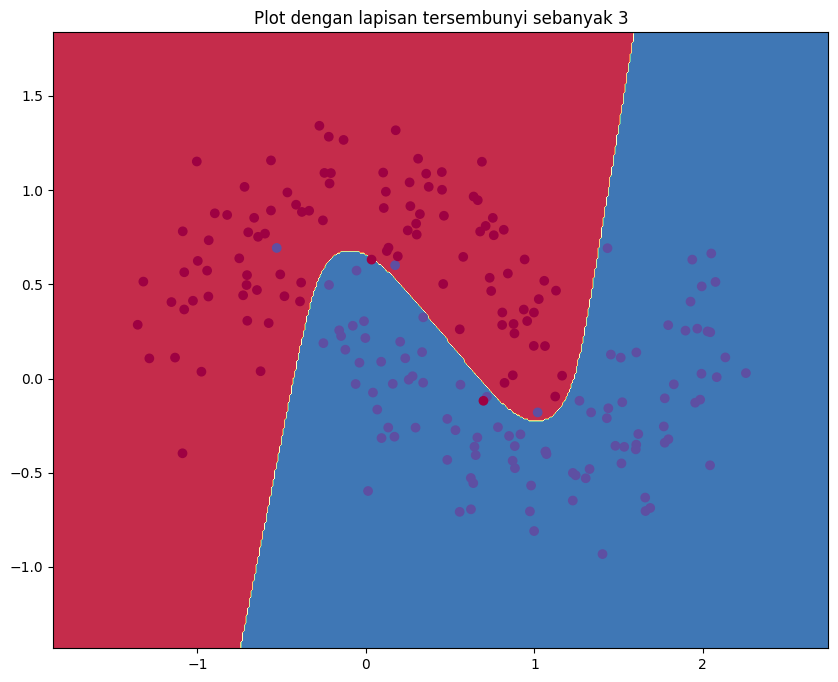

In [15]:
# Membangun model jaringan dengan tiga buah lapisan tersembunyi
model = build_model(3, print_loss=True)

# menampilkan plot
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Plot dengan lapisan tersembunyi sebanyak 3")

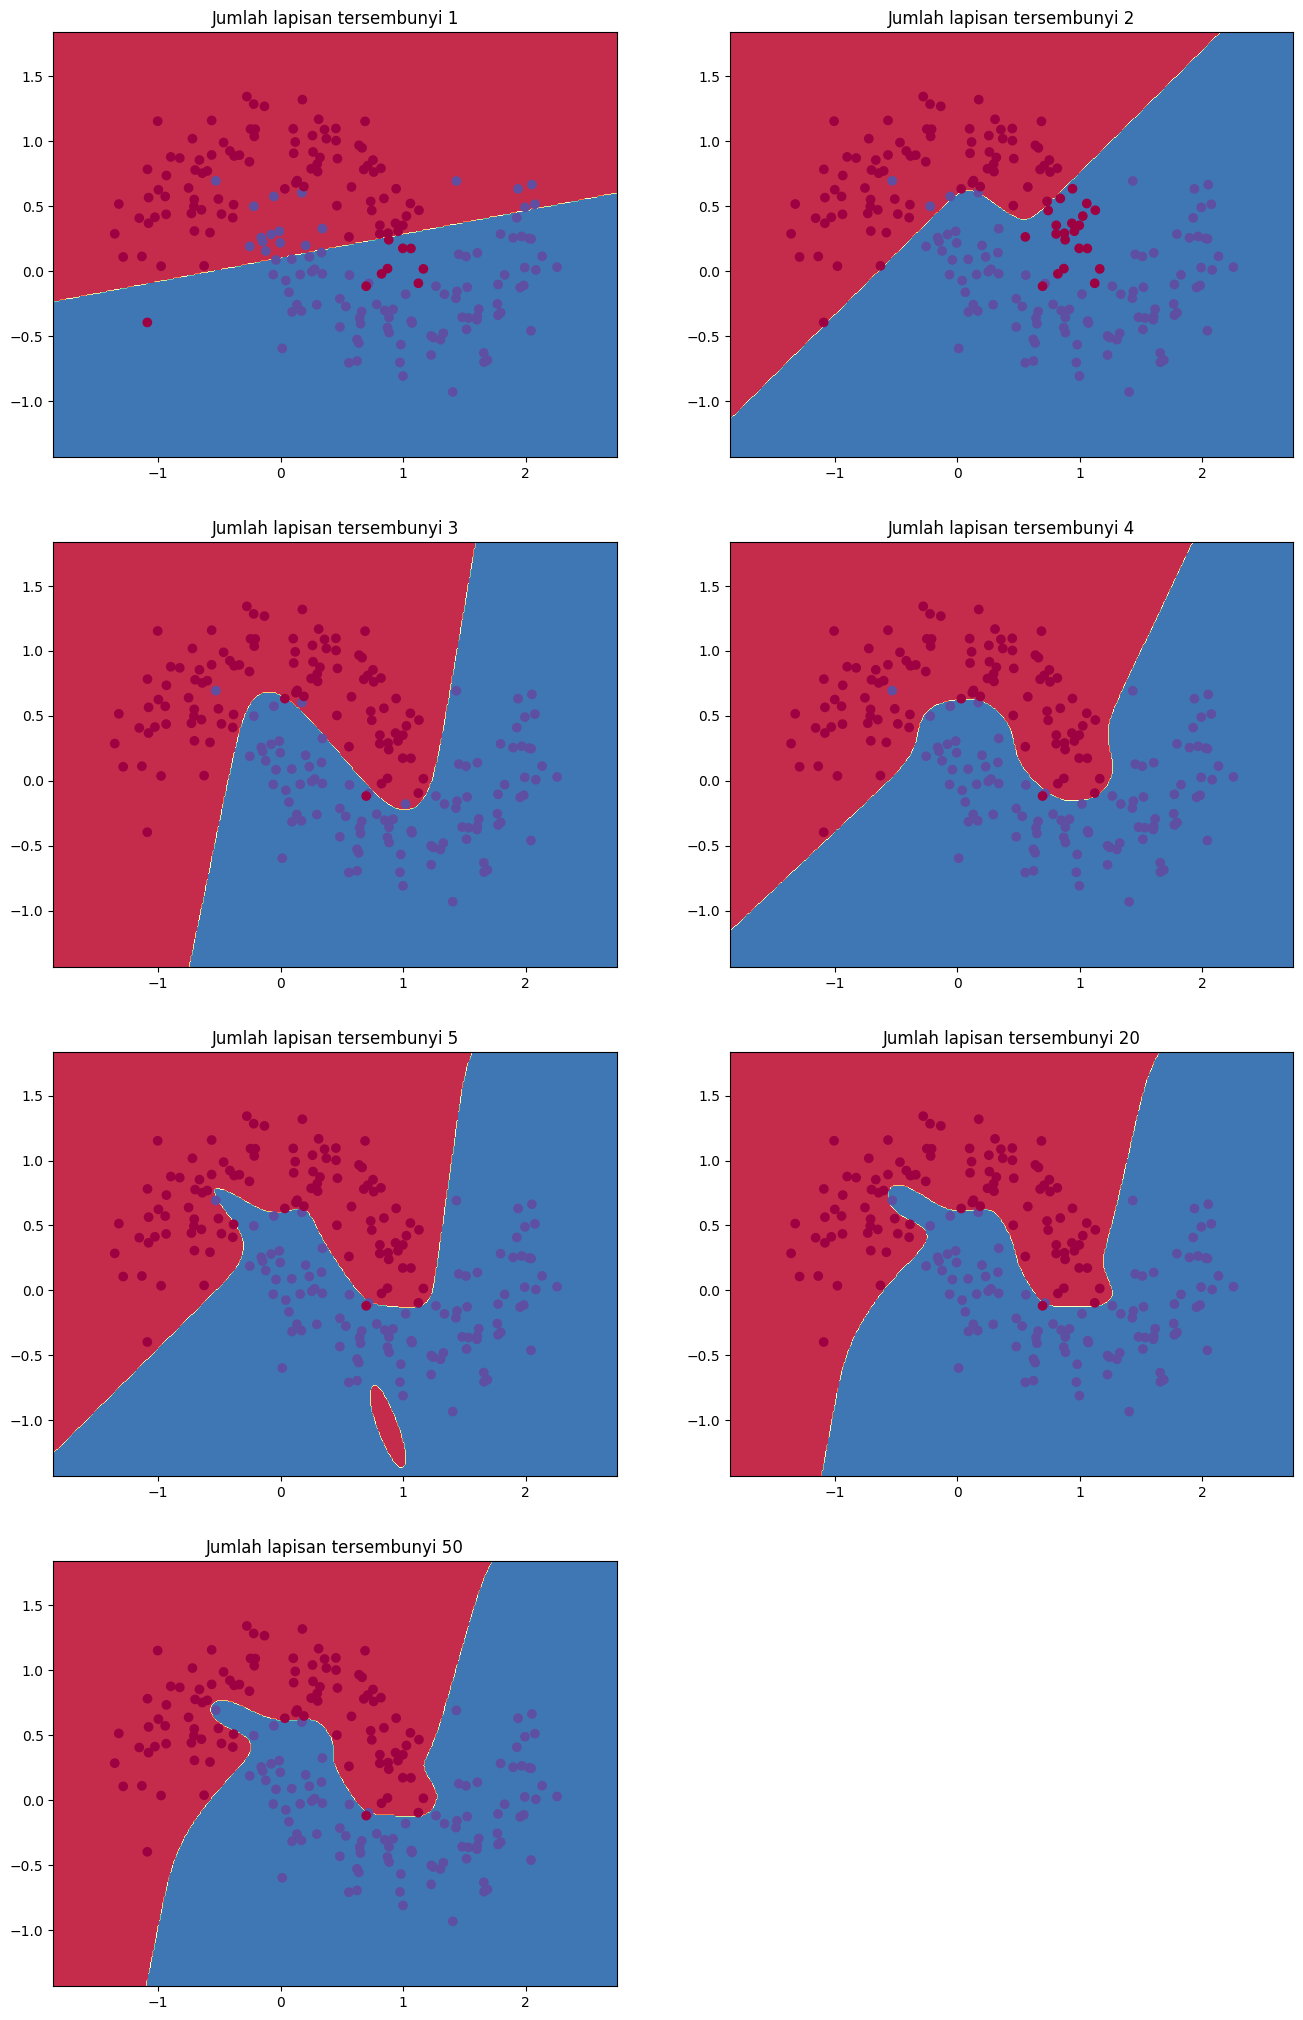

In [16]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Jumlah lapisan tersembunyi %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()